# Data Exploration

Hey! During this first step, please, take a look at the data set and just explore it, find the types of each column and try to find interesting things. Don't worry about data cleaning. Just exploration for now.  
You can answer the following questions:
- How many columns there are
- The type of each column
- The different values that a column can take
- Which do you think are the most important columns? If we are looking at the overall score.

Go wild! (Remember, so far, only exploration).


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder as le
#from sklearn_categorical import CategoricalImputer
# from sklearn_categoial import CorrespondenceAnalysis

In [2]:
df = pd.read_csv('Saber_11__2019-2.csv')

df.head()

/tmp/ipykernel_7213/1341599079.py:1: DtypeWarning: Columns (76,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Saber_11__2019-2.csv')


,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_TIENEETNIA,ESTU_PAIS_RESIDE,ESTU_ETNIA,...,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E
0,TI,COLOMBIA,M,02/18/2002 12:00:00 AM,20194,SB11201940031558,ESTUDIANTE,No,COLOMBIA,-,...,54.0,67,A1,208,25,50.9421557404314,2.0,2.0,PUBLICAR,NO
1,TI,COLOMBIA,M,06/28/2003 12:00:00 AM,20194,SB11201940303339,ESTUDIANTE,No,COLOMBIA,-,...,63.0,88,A2,299,83,59.767864431576,3.0,4.0,PUBLICAR,NO
2,TI,COLOMBIA,M,06/02/2001 12:00:00 AM,20194,SB11201940255017,ESTUDIANTE,No,COLOMBIA,-,...,64.0,89,A2,299,84,50.7642383644749,2.0,3.0,PUBLICAR,GENERACION E - GRATUIDAD
3,TI,COLOMBIA,M,04/26/2002 12:00:00 AM,20194,SB11201940154799,ESTUDIANTE,Si,COLOMBIA,Ninguno,...,53.0,67,A1,309,88,45.7791353123516,2.0,3.0,PUBLICAR,GENERACION E - GRATUIDAD
4,TI,COLOMBIA,M,02/05/2002 12:00:00 AM,20194,SB11201940280831,ESTUDIANTE,No,COLOMBIA,-,...,52.0,63,A1,288,78,52.9109464277177,3.0,3.0,PUBLICAR,NO


How many columns there are: 82

In [17]:
df = pd.DataFrame(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546212 entries, 0 to 546211
Data columns (total 82 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ESTU_TIPODOCUMENTO             546212 non-null  object 
 1   ESTU_NACIONALIDAD              546212 non-null  object 
 2   ESTU_GENERO                    546212 non-null  object 
 3   ESTU_FECHANACIMIENTO           546212 non-null  object 
 4   PERIODO                        546212 non-null  int64  
 5   ESTU_CONSECUTIVO               546212 non-null  object 
 6   ESTU_ESTUDIANTE                546212 non-null  object 
 7   ESTU_TIENEETNIA                546212 non-null  object 
 8   ESTU_PAIS_RESIDE               546212 non-null  object 
 9   ESTU_ETNIA                     546212 non-null  object 
 10  ESTU_DEPTO_RESIDE              545835 non-null  object 
 11  ESTU_COD_RESIDE_DEPTO          546212 non-null  object 
 12  ESTU_MCPIO_RESIDE             

The type of each column: There are 3 types of data analyzed for python, float64(2), int64(22), object(58) and most of the data is object (58) of the 82.

In [48]:
df['ESTU_TIPODOCUMENTO'].unique()
df.dropna()

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_TIENEETNIA,ESTU_PAIS_RESIDE,ESTU_ETNIA,...,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E
0,TI,COLOMBIA,M,02/18/2002 12:00:00 AM,20194,SB11201940031558,ESTUDIANTE,No,COLOMBIA,-,...,54.0,67,A1,208,25,50.9421557404314,2.0,2.0,PUBLICAR,NO
1,TI,COLOMBIA,M,06/28/2003 12:00:00 AM,20194,SB11201940303339,ESTUDIANTE,No,COLOMBIA,-,...,63.0,88,A2,299,83,59.767864431576,3.0,4.0,PUBLICAR,NO
2,TI,COLOMBIA,M,06/02/2001 12:00:00 AM,20194,SB11201940255017,ESTUDIANTE,No,COLOMBIA,-,...,64.0,89,A2,299,84,50.7642383644749,2.0,3.0,PUBLICAR,GENERACION E - GRATUIDAD
3,TI,COLOMBIA,M,04/26/2002 12:00:00 AM,20194,SB11201940154799,ESTUDIANTE,Si,COLOMBIA,Ninguno,...,53.0,67,A1,309,88,45.7791353123516,2.0,3.0,PUBLICAR,GENERACION E - GRATUIDAD
4,TI,COLOMBIA,M,02/05/2002 12:00:00 AM,20194,SB11201940280831,ESTUDIANTE,No,COLOMBIA,-,...,52.0,63,A1,288,78,52.9109464277177,3.0,3.0,PUBLICAR,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546207,CC,COLOMBIA,M,02/25/1999 12:00:00 AM,20194,SB11201940195862,ESTUDIANTE,No,COLOMBIA,-,...,58.0,79,A2,360,99,47.5807720132296,2.0,2.0,PUBLICAR,GENERACION E - EXCELENCIA NACIONAL
546208,TI,COLOMBIA,M,10/14/2002 12:00:00 AM,20194,SB11201940253002,ESTUDIANTE,No,COLOMBIA,-,...,74.0,97,B1,360,99,57.406418472062,3.0,4.0,PUBLICAR,GENERACION E - EXCELENCIA NACIONAL
546209,TI,COLOMBIA,M,11/22/2002 12:00:00 AM,20194,SB11201940364767,ESTUDIANTE,No,COLOMBIA,-,...,72.0,96,B1,377,100,71.2254308010465,4.0,3.0,PUBLICAR,GENERACION E - EXCELENCIA DEPARTAMENTAL
546210,TI,COLOMBIA,M,11/10/2002 12:00:00 AM,20194,SB11201940210026,ESTUDIANTE,No,COLOMBIA,-,...,46.0,45,A-,278,73,38.1334451267846,1.0,2.0,PUBLICAR,GENERACION E - GRATUIDAD


Separamos las variables cualitativas de las cuantitativas:

In [49]:
tipos = df.dtypes

In [55]:
variables_cuantitativas = tipos[tipos == 'int64'].index.tolist()
df_cuantitativo = df[variables_cuantitativas]

In [86]:
df_cuantitativo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546212 entries, 0 to 546211
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   PERIODO                        546212 non-null  int64
 1   COLE_CODIGO_ICFES              546212 non-null  int64
 2   COLE_COD_DANE_ESTABLECIMIENTO  546212 non-null  int64
 3   COLE_COD_DANE_SEDE             546212 non-null  int64
 4   COLE_COD_MCPIO_UBICACION       546212 non-null  int64
 5   COLE_COD_DEPTO_UBICACION       546212 non-null  int64
 6   ESTU_COD_MCPIO_PRESENTACION    546212 non-null  int64
 7   ESTU_COD_DEPTO_PRESENTACION    546212 non-null  int64
 8   PUNT_LECTURA_CRITICA           546212 non-null  int64
 9   PERCENTIL_LECTURA_CRITICA      546212 non-null  int64
 10  DESEMP_LECTURA_CRITICA         546212 non-null  int64
 11  PUNT_MATEMATICAS               546212 non-null  int64
 12  PERCENTIL_MATEMATICAS          546212 non-null  int64
 13 

In [57]:
variables_cualitativas = tipos[tipos == 'object'].index.tolist()
df_cualitativo = df[variables_cualitativas]

In [58]:
df_cualitativo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546212 entries, 0 to 546211
Data columns (total 58 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   ESTU_TIPODOCUMENTO             546212 non-null  object
 1   ESTU_NACIONALIDAD              546212 non-null  object
 2   ESTU_GENERO                    546212 non-null  object
 3   ESTU_FECHANACIMIENTO           546212 non-null  object
 4   ESTU_CONSECUTIVO               546212 non-null  object
 5   ESTU_ESTUDIANTE                546212 non-null  object
 6   ESTU_TIENEETNIA                546212 non-null  object
 7   ESTU_PAIS_RESIDE               546212 non-null  object
 8   ESTU_ETNIA                     546212 non-null  object
 9   ESTU_DEPTO_RESIDE              545835 non-null  object
 10  ESTU_COD_RESIDE_DEPTO          546212 non-null  object
 11  ESTU_MCPIO_RESIDE              545835 non-null  object
 12  ESTU_COD_RESIDE_MCPIO          546212 non-nu

In [72]:
pca = PCA(n_components=22)
principal_components = pca.fit_transform(df_cuantitativo)

In [73]:
principal_df = pd.DataFrame(data = principal_components)
#print(principal_df)
print(pca.explained_variance_ratio_)

[9.91290015e-01 8.70998499e-03 3.06927975e-12 7.73289498e-14]


<AxesSubplot:>

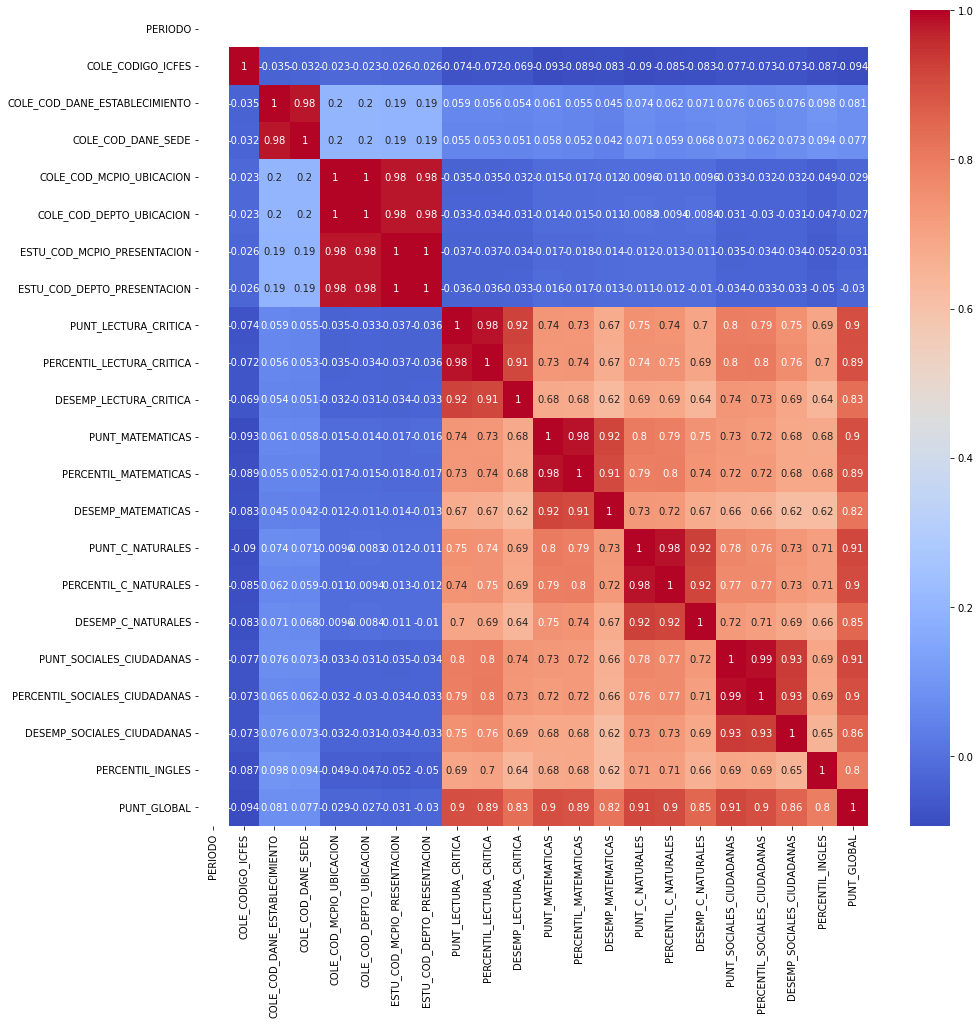

In [82]:
corr = df_cuantitativo.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, cmap='coolwarm', annot=True)

In [84]:
df_cuantitativo.describe()

,PERIODO,COLE_CODIGO_ICFES,COLE_COD_DANE_ESTABLECIMIENTO,COLE_COD_DANE_SEDE,COLE_COD_MCPIO_UBICACION,COLE_COD_DEPTO_UBICACION,ESTU_COD_MCPIO_PRESENTACION,ESTU_COD_DEPTO_PRESENTACION,PUNT_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,...,PERCENTIL_MATEMATICAS,DESEMP_MATEMATICAS,PUNT_C_NATURALES,PERCENTIL_C_NATURALES,DESEMP_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PERCENTIL_INGLES,PUNT_GLOBAL
count,546212.0,546212.000000,5.462120e+05,5.462120e+05,546212.000000,546212.000000,546212.000000,546212.000000,546212.000000,546212.000000,...,546212.000000,546212.000000,546212.000000,546212.000000,546212.000000,546212.000000,546212.000000,546212.000000,546212.000000,546212.000000
mean,20194.0,197397.840712,2.038424e+11,2.044208e+11,32755.704584,32.516563,32723.924917,32.503804,52.157305,50.111151,...,50.110596,2.440651,48.234779,50.157646,2.020730,46.224589,50.179648,1.901584,50.098669,246.186464
std,0.0,229636.502160,9.221826e+10,9.302404e+10,26364.009436,26.340054,26425.441138,26.399203,10.537963,28.959257,...,28.947324,0.752315,10.764035,28.935705,0.761262,12.140588,28.911682,0.820178,28.917401,51.386858
min,20194.0,75.000000,1.050010e+11,1.050010e+11,5001.000000,5.000000,5001.000000,5.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,20194.0,45732.000000,1.170500e+11,1.171740e+11,11001.000000,11.000000,11001.000000,11.000000,45.000000,25.000000,...,25.000000,2.000000,40.000000,25.000000,1.000000,37.000000,25.000000,1.000000,25.000000,207.000000
50%,20194.0,113076.000000,1.732085e+11,1.733190e+11,20750.000000,20.000000,20250.000000,20.000000,52.000000,50.000000,...,50.000000,3.000000,48.000000,50.000000,2.000000,45.000000,50.000000,2.000000,50.000000,243.000000
75%,20194.0,194779.000000,3.050010e+11,3.050010e+11,54001.000000,54.000000,54001.000000,54.000000,60.000000,75.000000,...,75.000000,3.000000,56.000000,75.000000,3.000000,55.000000,75.000000,2.000000,75.000000,282.000000
max,20194.0,728303.000000,8.548740e+11,8.548740e+11,99773.000000,99.000000,99773.000000,99.000000,100.000000,100.000000,...,100.000000,4.000000,100.000000,100.000000,4.000000,100.000000,100.000000,4.000000,100.000000,477.000000


/home/felipe/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/felipe/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').